In [19]:
# %pip install -U pip wheel
%pip install -r ../requirements.txt

   ---------------------------------------- 0.0/858.3 kB ? eta -:--:--
   ----- ---------------------------------- 112.6/858.3 kB 3.2 MB/s eta 0:00:01
   ------------------- -------------------- 419.8/858.3 kB 5.2 MB/s eta 0:00:01
   ---------------------------------------- 858.3/858.3 kB 6.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Initially Based on https://gist.github.com/HenryJia/23db12d61546054aa43f8dc587d9dc2c

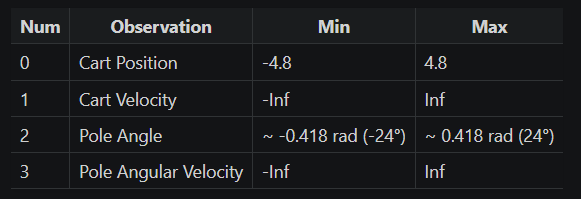

In [20]:
import numpy as np
import pandas as pd
import gymnasium as gym

In [29]:
desired_state = np.array([0, 0, 0, 0])
desired_mask = np.array([0.1, 0, 1, 0])

P, I, D = 0.1, 0.01, 0.5

In [38]:
env = gym.make('CartPole-v1')
# env = gym.make('CartPole-v1', render_mode="human")

for i_episode in range(20):
    state, info = env.reset()
    integral = 0
    derivative = 0
    prev_error = 0
    for t in range(500):
        env.render()
        error = state - desired_state

        integral += error
        derivative = error - prev_error
        prev_error = error

        pid = np.dot(P * error + I * integral + D * derivative, desired_mask)

        action = 0 if pid <= 0 else 1

        state, reward, terminated, truncated, info = env.step(action)
        #state, reward, done, info = env.step(action)
        if terminated or truncated:
            print("Episode finished after {} timesteps".format(t+1))
            break
env.close()

c:\Source\studienarbeit-ml-controls\.env\Lib\site-packages\gymnasium\envs\classic_control\cartpole.py:215: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym.make("CartPole-v1", render_mode="rgb_array")
  gym.logger.warn(


Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps


In [24]:
env.close()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
state = [0.5, 0.1, 0.05, -0.2]
pos_setpoint = 0.1

fig, ax = plt.subplots()